In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# Read data file
df = pd.read_excel('~/Downloads/data2.xlsx')
print(df)

    Rank the factors that influence the decision to let your child participate in physical activities:
0                                           1;4;2;3;5;                                                
1                                           4;2;1;3;5;                                                
2                                           4;1;2;3;5;                                                
3                                           4;3;1;2;5;                                                
4                                           4;1;2;3;5;                                                
..                                                 ...                                                
600                                         2;1;3;5;4;                                                
601                                         1;3;5;4;2;                                                
602                                         1;3;5;2;4;                   

In [2]:
import pandas as pd

# Read data file
df = pd.read_excel('~/Downloads/data2.xlsx')

# Initialize counters for each label and position
position_counts = {
    'The facility is near school/home': [0, 0, 0, 0, 0],
    'Child is happy after participating in activities': [0, 0, 0, 0, 0],
    'Good attitude from coach - service team': [0, 0, 0, 0, 0],
    'Ensure safety': [0, 0, 0, 0, 0],
    'Modern and suitable equipment': [0, 0, 0, 0, 0]
}

# Mapping of numbers to labels
label_mapping = {
    '1': 'The facility is near school/home',
    '2': 'Child is happy after participating in activities',
    '3': 'Good attitude from coach - service team',
    '4': 'Ensure safety',
    '5': 'Modern and suitable equipment'
}

# Iterate through each row in the dataframe
for index, row in df.iterrows():
    # Split the rankings into a list
    rankings = row.iloc[0].split(';')
    # Iterate through each position and check the label
    for i in range(5):
        if rankings[i] in label_mapping:
            label = label_mapping[rankings[i]]
            position_counts[label][i] += 1

# Create a DataFrame for the table
table_data = {
    'First Choice': [position_counts[label][0] for label in position_counts],
    'Second Choice': [position_counts[label][1] for label in position_counts],
    'Third Choice': [position_counts[label][2] for label in position_counts],
    'Fourth Choice': [position_counts[label][3] for label in position_counts],
    'Fifth Choice': [position_counts[label][4] for label in position_counts]
}

table_df = pd.DataFrame(table_data, index=position_counts.keys())

# Print the table
print(table_df)


                                                  First Choice  Second Choice  \
The facility is near school/home                           444             62   
Child is happy after participating in activities           103            340   
Good attitude from coach - service team                      9            152   
Ensure safety                                               46             35   
Modern and suitable equipment                                3             16   

                                                  Third Choice  Fourth Choice  \
The facility is near school/home                            44             34   
Child is happy after participating in activities            94             48   
Good attitude from coach - service team                    273            131   
Ensure safety                                               39             95   
Modern and suitable equipment                              155            297   

                          

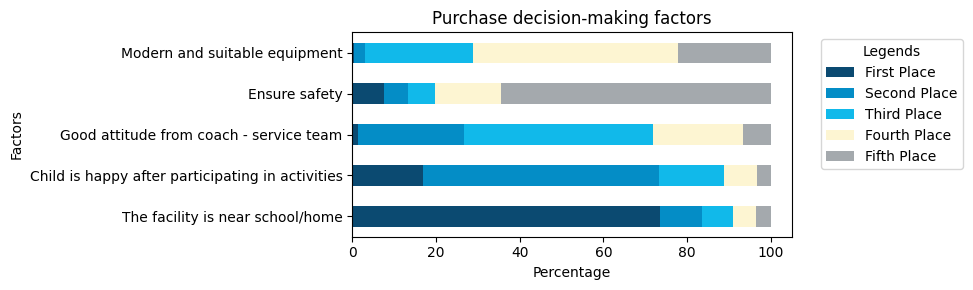

In [3]:
# Create a DataFrame for the table
table_data = {
    'First Place': [position_counts[label][0] for label in position_counts],
    'Second Place': [position_counts[label][1] for label in position_counts],
    'Third Place': [position_counts[label][2] for label in position_counts],
    'Fourth Place': [position_counts[label][3] for label in position_counts],
    'Fifth Place': [position_counts[label][4] for label in position_counts]
}

table_df = pd.DataFrame(table_data, index=position_counts.keys())

# Normalize the counts to get percentages
table_df_percentage = table_df.div(table_df.sum(axis=1), axis=0) * 100

# Define colors
colors = ['#0B4A71', '#048DC6', '#11B9EA', '#FDF5D2', '#A4A9AD']

# Create a horizontal 100% stacked bar chart
table_df_percentage.plot(kind='barh', stacked=True, figsize=(10, 3), color=colors)
plt.ylabel('Factors')
plt.xlabel('Percentage')
plt.title('Purchase decision-making factors')
plt.legend(title='Legends', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the bar chart
plt.show()

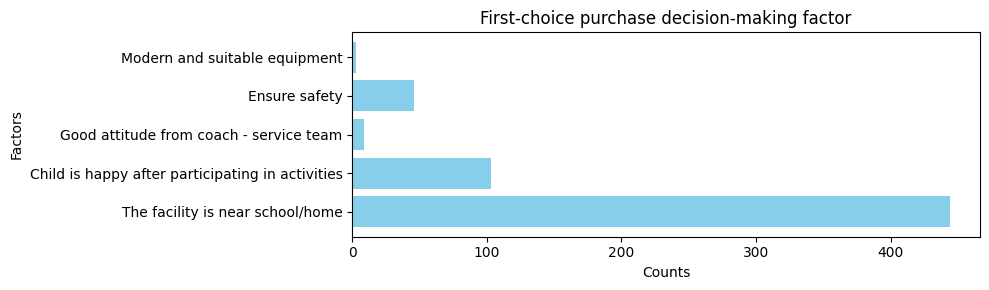

In [4]:
# Extract the first place counts
first_place_counts = {label: counts[0] for label, counts in position_counts.items()}

# Create a horizontal bar chart
plt.figure(figsize=(10, 3))
plt.barh(list(first_place_counts.keys()), list(first_place_counts.values()), color='skyblue')
plt.ylabel('Factors')
plt.xlabel('Counts')
plt.title('First-choice purchase decision-making factor')
plt.tight_layout()

# Show the bar chart
plt.show()